# Activation Functions

### A simple visual showcase of what each activation function does.

## Tanh (Hyperbolic Tangent)

In [1]:
from dl_lib.activations import (
    tanh, tanh_prime, relu, relu_prime,
    leaky_relu, leaky_relu_prime
)
from demo_helper import plot_activation_function

[-0.9866, -0.9836, -0.9799, -0.9754, -0.97, -0.9633, -0.9552, -0.9453, -0.9333, -0.9189, -0.9014, -0.8804, -0.8553, -0.8254, -0.79, -0.7484, -0.7, -0.6442, -0.5805, -0.5089, -0.4294, -0.3427, -0.2497, -0.1519, -0.051, 0.051, 0.1519, 0.2497, 0.3427, 0.4294, 0.5089, 0.5805, 0.6442, 0.7, 0.7484, 0.79, 0.8254, 0.8553, 0.8804, 0.9014, 0.9189, 0.9333, 0.9453, 0.9552, 0.9633, 0.97, 0.9754, 0.9799, 0.9836, 0.9866]


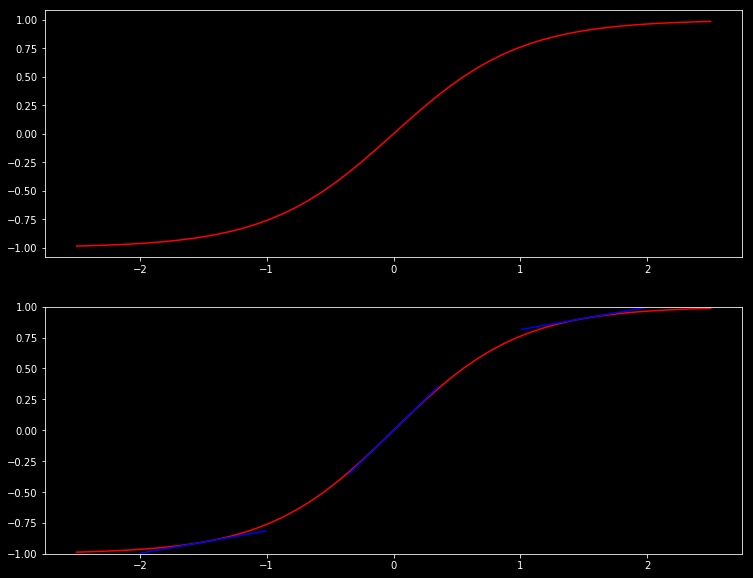

In [2]:
plot_activation_function(tanh, tanh_prime, 
                         plot_scale=2.5, 
                         tangent_points=[-1.5, 0, 1.5])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.051, 0.1531, 0.2551, 0.3571, 0.4592, 0.5612, 0.6633, 0.7653, 0.8673, 0.9694, 1.0714, 1.1735, 1.2755, 1.3776, 1.4796, 1.5816, 1.6837, 1.7857, 1.8878, 1.9898, 2.0918, 2.1939, 2.2959, 2.398, 2.5]


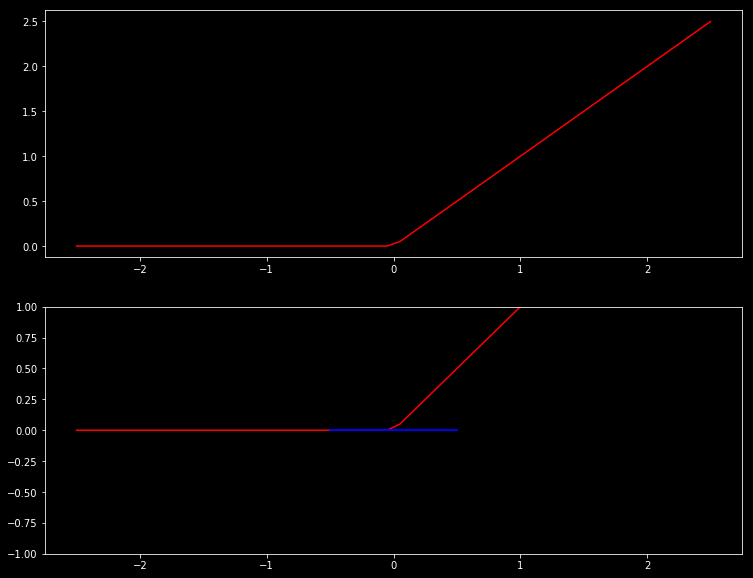

In [3]:
plot_activation_function(relu, relu_prime, 
                         plot_scale=2.5, 
                         tangent_points=[-1.5, 0, 1.5])

[-0.25, -0.2398, -0.2296, -0.2194, -0.2092, -0.199, -0.1888, -0.1786, -0.1684, -0.1582, -0.148, -0.1378, -0.1276, -0.1173, -0.1071, -0.0969, -0.0867, -0.0765, -0.0663, -0.0561, -0.0459, -0.0357, -0.0255, -0.0153, -0.0051, 0.051, 0.1531, 0.2551, 0.3571, 0.4592, 0.5612, 0.6633, 0.7653, 0.8673, 0.9694, 1.0714, 1.1735, 1.2755, 1.3776, 1.4796, 1.5816, 1.6837, 1.7857, 1.8878, 1.9898, 2.0918, 2.1939, 2.2959, 2.398, 2.5]


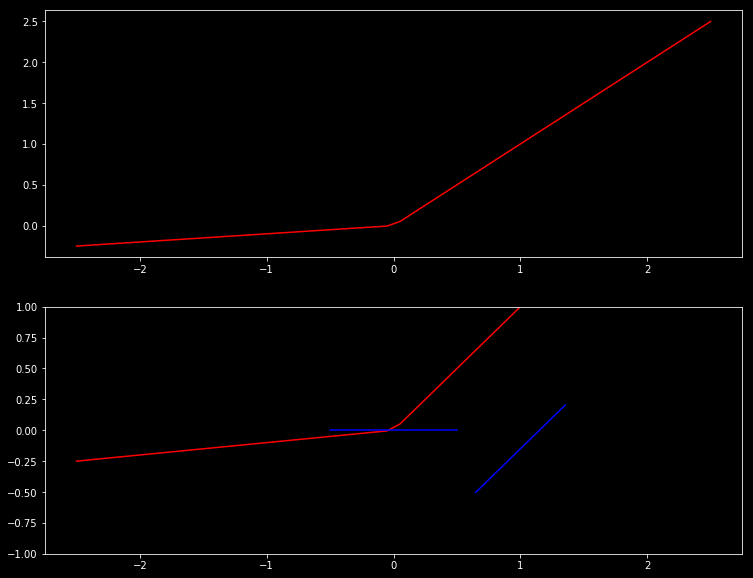

In [4]:
plot_activation_function(leaky_relu, leaky_relu_prime, 
                         plot_scale=2.5, 
                         tangent_points=[-1.5, 0, 1.5])